In [32]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
from mltools import plot_data, plot_frontiere, make_grid, gen_arti


In [33]:
def mse(w, x, y):
    return (x @ w - y)**2


def mse_grad(w, x, y):
    return 2 * x * (x @ w - y)


def reglog(w, x, y):
    def sig(x): return 1 / (1 + np.exp(- x @ w))
    return (sig(x) - y)**2


def reglog_grad(w, x, y):
    # a implémenter
    pass


def check_fonctions():
    # On fixe la seed de l'aléatoire pour vérifier les fonctions
    np.random.seed(0)
    datax, datay = gen_arti(epsilon=0.1)
    wrandom = np.random.randn(datax.shape[1], 1)
    assert (np.isclose(mse(wrandom, datax, datay).mean(), 0.54731,
            rtol=1e-4)), mse(wrandom, datax, datay).mean()
    # assert(np.isclose(reglog(wrandom,datax,datay).mean(), 0.57053,rtol=1e-4)), reglog(wrandom,datax,datay).mean()
    assert (np.isclose(mse_grad(wrandom, datax, datay).mean(), -
            1.43120, rtol=1e-4)), mse_grad(wrandom, datax, datay).mean()
    # assert(np.isclose(reglog_grad(wrandom,datax,datay).mean(),-0.42714,rtol=1e-4)), np.isclose(reglog_grad(wrandom,datax,datay).mean()
    np.random.seed()


check_fonctions()


# Descente de gradient

In [34]:
def descente_gradient(datax, datay, f_loss, f_grad, eps, iter=1000):
    w_old = np.random.random(size=(datax.shape[1], 1))
    # w_old = np.zeros(datax.shape[1])
    w_list = [w_old]
    loss_list = [f_loss(w_old, datax, datay).mean()]
    for _ in tqdm(range(iter)):
        w = w_old - eps * f_grad(w_old, datax, datay).mean(axis=0).reshape(-1, 1)
        w_list.append(w)
        loss_list.append(f_loss(w, datax, datay).mean())

        if (np.abs((w - w_old)) < 1e-10).all():
            print(f'Convergence en {len(w_list)} itération')
            return w, w_list, loss_list
            
        w_old = w.copy()
    else:
        print(f"Non convergence en {len(w_list)}")
        return w, w_list, loss_list

# Tirage d'un jeu de données aléatoire avec un bruit de 0.1
datax, datay = gen_arti(epsilon=0.1, data_type=0)
_, w_list, _ = descente_gradient(datax, datay, mse, mse_grad, 1e-4)
len(w_list)

100%|██████████| 1000/1000 [00:00<00:00, 14312.49it/s]

Non convergence en 1001


1001

# Expérimentations

## Regression linéaire

100%|██████████| 10000/10000 [00:00<00:00, 15467.27it/s]


Non convergence en 10001


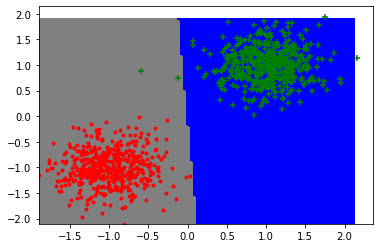

In [35]:
np.random.seed(2) 
# Fabrication d'une grille de discrétisation pour la visualisation de la fonction de coût
grid, x_grid, y_grid = make_grid(xmin=-2, xmax=2, ymin=-2, ymax=2, step=100)

plt.figure()
# Visualisation des données et de la frontière de décision pour un vecteur de poids w 
# après gradient
w, w_list, loss_list = descente_gradient(datax, datay, mse, mse_grad, 1e-10, 10000)
plot_frontiere(datax, lambda x: np.sign(x.dot(w)), step=100)
plot_data(datax, datay)

# Visualisation de la fonction de coût en 2D
# plt.figure()
# plt.contourf(x_grid, y_grid, np.array(
#     [mse(w, datax, datay).mean() for w in grid]).reshape(x_grid.shape), levels=20)



On a une non convergence avec une `seed=2`, autremement ça converge en une itération 🤔 y'a un probleme ??

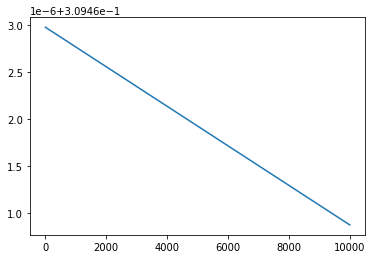

In [36]:
plt.plot(loss_list)

  0%|          | 0/10000 [00:00<?, ?it/s]

Convergence en 2 itération


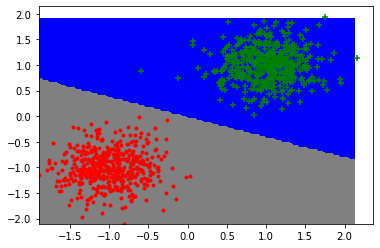

In [37]:
np.random.seed(42) 
# Fabrication d'une grille de discrétisation pour la visualisation de la fonction de coût
grid, x_grid, y_grid = make_grid(xmin=-2, xmax=2, ymin=-2, ymax=2, step=100)

plt.figure()
# Visualisation des données et de la frontière de décision pour un vecteur de poids w 
# après gradient
w, w_list, loss_list = descente_gradient(datax, datay, mse, mse_grad, 1e-10, 10000)
plot_frontiere(datax, lambda x: np.sign(x.dot(w)), step=100)
plot_data(datax, datay)

# Visualisation de la fonction de coût en 2D
# plt.figure()
# plt.contourf(x_grid, y_grid, np.array(
#     [mse(w, datax, datay).mean() for w in grid]).reshape(x_grid.shape), levels=20)

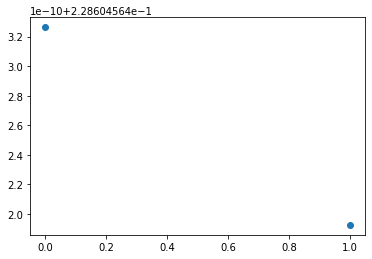

In [38]:
plt.scatter([i for i in range(len(loss_list))], loss_list)

## Regression Logistique

## Changement du pas

  0%|          | 0/10000 [00:00<?, ?it/s]

Convergence en 2 itération
convergence en 2 itération


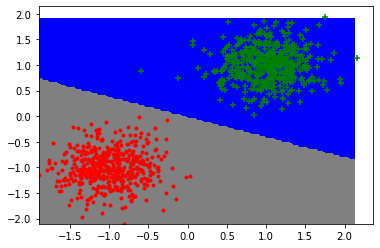

In [39]:
np.random.seed(42) 
# Fabrication d'une grille de discrétisation pour la visualisation de la fonction de coût
grid, x_grid, y_grid = make_grid(xmin=-2, xmax=2, ymin=-2, ymax=2, step=100)

plt.figure()
# Visualisation des données et de la frontière de décision pour un vecteur de poids w 
# après gradient
w, w_list, loss_list = descente_gradient(datax, datay, mse, mse_grad, 1e-50, 10000)
plot_frontiere(datax, lambda x: np.sign(x.dot(w)), step=100)
plot_data(datax, datay)
print(f'convergence en {len(w_list)} itération')
# Visualisation de la fonction de coût en 2D
# plt.figure()
# plt.contourf(x_grid, y_grid, np.array(
#     [mse(w, datax, datay).mean() for w in grid]).reshape(x_grid.shape), levels=20)